Project Title

Renewable Penetration & Electricity Price Volatility – Germany Case Study

Business Question

How does increasing wind and solar generation affect German day-ahead electricity prices, price volatility, and negative price events?

Time Period: 2022–2024

Hypotheses

H1: Higher renewable share → lower electricity prices H2: Higher renewable share → higher price volatility H3: Higher renewable share → more negative price events H4: Higher volatility increases value of flexibility assets (e.g., batteries).

Key Variables

Electricity price (€/MWh) Wind generation Solar generation Total load (demand)

Derived Variables

Renewable Share = (Wind + Solar) / Load

Volatility = Rolling 24h standard deviation of price

Negative Price Indicator = 1 if price < 0, else 0

In [3]:
import pandas as pd

df = pd.read_csv("time_series_60min.csv")
df.head()

,utc_timestamp,cet_cest_timestamp,DE_LU_load_actual_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual
0,2017-12-31T23:00:00Z,2018-01-01T00:00:00+0100,NaN,NaN,NaN,NaN
1,2018-01-01T00:00:00Z,2018-01-01T01:00:00+0100,NaN,NaN,NaN,NaN
2,2018-01-01T01:00:00Z,2018-01-01T02:00:00+0100,NaN,NaN,NaN,NaN
3,2018-01-01T02:00:00Z,2018-01-01T03:00:00+0100,NaN,NaN,NaN,NaN
4,2018-01-01T03:00:00Z,2018-01-01T04:00:00+0100,NaN,NaN,NaN,NaN


In [5]:
df = df[[
    "utc_timestamp",
    "DE_LU_load_actual_entsoe_transparency",
    "DE_LU_price_day_ahead",
    "DE_LU_solar_generation_actual",
    "DE_LU_wind_generation_actual"
]]

df.head()

,utc_timestamp,DE_LU_load_actual_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual
0,2017-12-31T23:00:00Z,NaN,NaN,NaN,NaN
1,2018-01-01T00:00:00Z,NaN,NaN,NaN,NaN
2,2018-01-01T01:00:00Z,NaN,NaN,NaN,NaN
3,2018-01-01T02:00:00Z,NaN,NaN,NaN,NaN
4,2018-01-01T03:00:00Z,NaN,NaN,NaN,NaN


In [6]:
df["utc_timestamp"] = pd.to_datetime(df["utc_timestamp"])

In [7]:
df.dtypes

,0
utc_timestamp,"datetime64[ns, UTC]"
DE_LU_load_actual_entsoe_transparency,float64
DE_LU_price_day_ahead,float64
DE_LU_solar_generation_actual,float64
DE_LU_wind_generation_actual,float64


In [8]:
df = df[
    (df["utc_timestamp"] >= "2018-01-01") &
    (df["utc_timestamp"] <= "2020-12-31")
]

In [9]:
df.head()


,utc_timestamp,DE_LU_load_actual_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual
1,2018-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2,2018-01-01 01:00:00+00:00,NaN,NaN,NaN,NaN
3,2018-01-01 02:00:00+00:00,NaN,NaN,NaN,NaN
4,2018-01-01 03:00:00+00:00,NaN,NaN,NaN,NaN
5,2018-01-01 04:00:00+00:00,NaN,NaN,NaN,NaN


In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

,0
utc_timestamp,0
DE_LU_load_actual_entsoe_transparency,0
DE_LU_price_day_ahead,0
DE_LU_solar_generation_actual,0
DE_LU_wind_generation_actual,0


In [12]:
df.shape

(17516, 5)

In [13]:
df["renewable_share"] = (
    df["DE_LU_wind_generation_actual"] +
    df["DE_LU_solar_generation_actual"]
) / df["DE_LU_load_actual_entsoe_transparency"]

In [14]:
df["renewable_share"].describe()

,renewable_share
count,17516.000000
mean,0.348431
std,0.198287
min,0.010759
25%,0.189750
50%,0.320491
75%,0.480577
max,0.980496


In [15]:
df.sort_values("renewable_share", ascending=False).head()

,utc_timestamp,DE_LU_load_actual_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual,renewable_share
21973,2020-07-04 12:00:00+00:00,50606.0,0.91,22326.0,27293.0,0.980496
21974,2020-07-04 13:00:00+00:00,49751.0,0.29,19882.0,28175.0,0.965950
20821,2020-05-17 12:00:00+00:00,44173.0,-16.76,27210.0,15319.0,0.962783
21972,2020-07-04 11:00:00+00:00,51984.0,-4.71,23504.0,26279.0,0.957660
21970,2020-07-04 09:00:00+00:00,52842.0,0.38,22820.0,27206.0,0.946709


In [16]:
df.sort_values("renewable_share").head()

,utc_timestamp,DE_LU_load_actual_entsoe_transparency,DE_LU_price_day_ahead,DE_LU_solar_generation_actual,DE_LU_wind_generation_actual,renewable_share
9335,2019-01-24 22:00:00+00:00,60231.0,63.79,0.0,648.0,0.010759
13875,2019-08-02 02:00:00+00:00,44690.0,38.10,0.0,521.0,0.011658
13876,2019-08-02 03:00:00+00:00,47411.0,40.72,24.0,536.0,0.011812
9334,2019-01-24 21:00:00+00:00,63874.0,69.92,0.0,778.0,0.012180
7001,2018-10-19 16:00:00+00:00,63361.0,81.96,51.0,753.0,0.012689


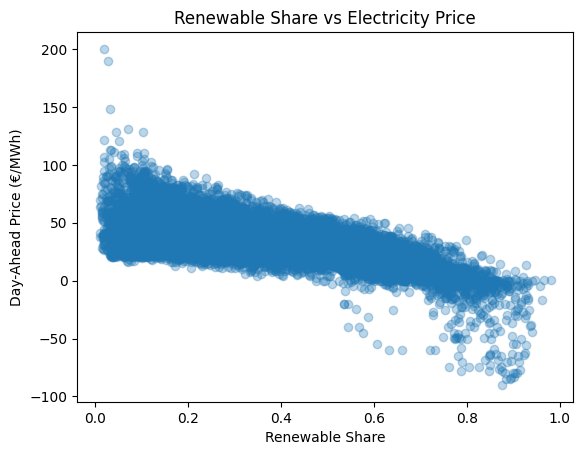

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["renewable_share"], df["DE_LU_price_day_ahead"], alpha=0.3)
plt.xlabel("Renewable Share")
plt.ylabel("Day-Ahead Price (€/MWh)")
plt.title("Renewable Share vs Electricity Price")
plt.show()

In [18]:
df["renewable_share"].corr(df["DE_LU_price_day_ahead"])

np.float64(-0.6555526230208713)

In [19]:
low = df[df["renewable_share"] <= df["renewable_share"].quantile(0.25)]
high = df[df["renewable_share"] >= df["renewable_share"].quantile(0.75)]

print("Average price (low renewable):", low["DE_LU_price_day_ahead"].mean())
print("Average price (high renewable):", high["DE_LU_price_day_ahead"].mean())

Average price (low renewable): 46.68011874857273
Average price (high renewable): 18.53007535967116


In [20]:
df["negative_price"] = (df["DE_LU_price_day_ahead"] < 0).astype(int)

In [21]:
low = df[df["renewable_share"] <= df["renewable_share"].quantile(0.25)]
high = df[df["renewable_share"] >= df["renewable_share"].quantile(0.75)]

In [22]:
print("Overall negative price frequency:",
      df["negative_price"].mean())

print("Negative price frequency (high renewable):",
      high["negative_price"].mean())

print("Negative price frequency (low renewable):",
      low["negative_price"].mean())

Overall negative price frequency: 0.02763187942452615
Negative price frequency (high renewable): 0.1105275176981046
Negative price frequency (low renewable): 0.0


In [23]:
df["date"] = df["utc_timestamp"].dt.date

In [24]:
daily_vol = df.groupby("date")["DE_LU_price_day_ahead"].std().reset_index()
daily_vol.columns = ["date", "daily_price_volatility"]

In [25]:
daily_renew = df.groupby("date")["renewable_share"].mean().reset_index()

In [26]:
daily = pd.merge(daily_vol, daily_renew, on="date")

In [27]:
daily["daily_price_volatility"].corr(daily["renewable_share"])

np.float64(0.29614449485932154)

In [28]:
import statsmodels.api as sm

X = df["renewable_share"]
X = sm.add_constant(X)

y = df["DE_LU_price_day_ahead"]

model = sm.OLS(y, X).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     DE_LU_price_day_ahead   R-squared:                       0.430
Model:                               OLS   Adj. R-squared:                  0.430
Method:                    Least Squares   F-statistic:                 1.320e+04
Date:                   Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                           18:47:36   Log-Likelihood:                -70696.
No. Observations:                  17516   AIC:                         1.414e+05
Df Residuals:                      17514   BIC:                         1.414e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const       

Commercial Implications


Renewable cannibalization: High renewable penetration reduces day-ahead prices materially (top quartile avg price €18.5 vs €46.7), compressing merchant revenues for wind/solar.

Downside risk: Negative prices concentrate in high-renewable hours (11% frequency vs 0% in low-renewable), increasing revenue uncertainty without curtailment/contract protections.

Flexibility + contracting: Higher renewable penetration is associated with higher volatility (corr ~0.30), supporting the business case for flexibility (storage) and for revenue stabilization tools (PPAs/CfDs).


